In [21]:
import os, sys
import numpy as np
import ants
import argparse
import shutil
import logging
import subprocess
import tqdm
import matplotlib.pyplot as plt 
import pandas as pd

In [20]:
os.listdir('/anvar/public_datasets/tcia/manifest-1614264588831/')

['DirectoryNamesMappingModality.csv',
 'metadata.csv',
 'Vestibular-Schwannoma-SEG']

In [46]:
metadata = pd.read_csv('/anvar/public_datasets/tcia/manifest-1614264588831/metadata.csv')

In [49]:
metadata['Manufacturer'].value_counts()

Elekta     1452
SIEMENS     484
Name: Manufacturer, dtype: int64

In [18]:
# os.mkdir('/anvar/public_datasets/preproc_study/schw/dicom/')

In [22]:
schw_paths = pd.read_csv('/anvar/public_datasets/tcia/manifest-1614264588831/DirectoryNamesMappingModality.csv')

In [25]:
schw_paths['Modality'].value_counts()

T1 image       242
T2 image       242
T1 RTSTRUCT    242
T2 RTSTRUCT    242
T1 RTPLAN      242
T2 RTPLAN      242
T1 RTDOSE      242
T2 RTDOSE      242
Name: Modality, dtype: int64

In [41]:
savedir  = '/anvar/public_datasets/preproc_study/schw/dicom/'
basedir = '/anvar/public_datasets/preproc_study/schw/orig/'
os.listdir(savedir + '/VS-SEG-077')

['T1', 'T2', 'RTSTRUCT']

In [34]:
# os.mkdir('/anvar/public_datasets/preproc_study/schw/orig/')

In [121]:
os.listdir('/anvar/public_datasets/preproc_study/schw/')

['dicom', '3a_atlas', 'orig', '2a_interp', '4a_resamp', '1_reg']

In [109]:
for i in os.listdir('/anvar/public_datasets/preproc_study/schw/orig/'):
    print(i)
    print(os.listdir(basedir + i))

VS-SEG-157
['T2.nii.gz', 'T1.nii.gz', 'T1_SEG.nii.gz']
VS-SEG-239
['T2.nii.gz', 'T1.nii.gz']
VS-SEG-147
['T2.nii.gz', 'T1.nii.gz', 'T1_SEG.nii.gz']
VS-SEG-101
['T2.nii.gz', 'T1.nii.gz', 'T1_SEG.nii.gz']
VS-SEG-093
['T2.nii.gz', 'T1.nii.gz', 'T1_SEG.nii.gz']
VS-SEG-150
['T2.nii.gz', 'T1.nii.gz', 'T1_SEG.nii.gz']
VS-SEG-079
['T2.nii.gz', 'T1.nii.gz', 'T1_SEG.nii.gz']
VS-SEG-010
['T2.nii.gz', 'T1.nii.gz', 'T1_SEG.nii.gz']
VS-SEG-020
['T2.nii.gz', 'T1.nii.gz', 'T1_SEG.nii.gz']
VS-SEG-018
['T2.nii.gz', 'T1.nii.gz', 'T1_SEG.nii.gz']
VS-SEG-245
['T2.nii.gz', 'T1.nii.gz']
VS-SEG-135
['T2.nii.gz', 'T1.nii.gz', 'T1_SEG.nii.gz']
VS-SEG-084
['T2.nii.gz', 'T1.nii.gz', 'T1_SEG.nii.gz']
VS-SEG-056
['T2.nii.gz', 'T1.nii.gz', 'T1_SEG.nii.gz']
VS-SEG-012
['T2.nii.gz', 'T1.nii.gz', 'T1_SEG.nii.gz']
VS-SEG-042
['T2.nii.gz', 'T1.nii.gz', 'T1_SEG.nii.gz']
VS-SEG-175
['T2.nii.gz', 'T1.nii.gz', 'T1_SEG.nii.gz']
VS-SEG-008
['T2.nii.gz', 'T1.nii.gz', 'T1_SEG.nii.gz']
VS-SEG-136
['T2.nii.gz', 'T1.nii.gz', 'T1_SE

In [112]:
ants.image_read('/anvar/public_datasets/preproc_study/schw/orig/VS-SEG-078/T2.nii.gz')

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (448, 448, 14)
	 Spacing    : (0.4688, 0.4688, 3.0)
	 Origin     : (-109.8426, -124.9758, -85.8844)
	 Direction  : [ 1.  0.  0. -0.  1.  0.  0.  0.  1.]

In [113]:
ants.image_read('/anvar/public_datasets/preproc_study/schw/orig/VS-SEG-078/T2_Eq_1.nii.gz')

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (448, 448, 28)
	 Spacing    : (0.4688, 0.4688, 4.0)
	 Origin     : (-109.8426, -124.9758, -85.8844)
	 Direction  : [ 1.  0.  0. -0.  1.  0.  0.  0.  1.]

In [55]:
!/home/kate/miniconda3/bin/pip install --upgrade dicom-csv

  Created wheel for dicom-csv: filename=dicom_csv-0.2.3-py3-none-any.whl size=20347 sha256=4e2c7a3c7a822711ea1e6a306deb8a1b2b8102dce6ddd7525b81ab1273c2cd39
  Stored in directory: /home/kate/.cache/pip/wheels/b0/2c/e9/a8ae6bf1f5f087dd84dd2593bf95656bdf0bfd7f6b17c0d962
Successfully built dicom-csv
  Attempting uninstall: dicom-csv
    Found existing installation: dicom-csv 0.2.1
    Uninstalling dicom-csv-0.2.1:
      Successfully uninstalled dicom-csv-0.2.1


In [61]:
from pydicom import dcmread
from pathlib import Path

from dicom_csv import order_series, stack_images
from dicom_csv.rtstruct import read_rtstruct, contours_to_image

from mri_brain.contours import mask_to_dicom


root = Path('/anvar/public_datasets/preproc_study/schw/dicom/VS-SEG-001/')
saveTo = Path('/anvar/public_datasets/preproc_study/schw/dicom/VS-SEG-001/RTSTRUCT_DCM')
os.mkdir(saveTo)

rtstruct = dcmread(root / 'RTSTRUCT/1-1.dcm')
image_series = order_series([dcmread(im) for im in (root / 'T1').glob('*')])
result = contours_to_image(image_series, rtstruct)
print(result.keys())

mask_tv = result[('TV', 0)].get_mask()
mask_skull = result[('*Skull', 3)].get_mask()

mask_to_dicom(image_series.copy(), mask_tv, saveTo)

dict_keys([('TV', 0), ('Cochlea', 1), ('Vol2016', 2), ('*Skull', 3)])


In [101]:
for i in os.listdir('/anvar/public_datasets/preproc_study/schw/dicom/'):
    print(i)
    root = Path('/anvar/public_datasets/preproc_study/schw/dicom/' +  i)
    saveTo = Path('/anvar/public_datasets/preproc_study/schw/dicom/' +  i + '/RTSTRUCT_DCM/')
    os.makedirs(saveTo, exist_ok = True)           
                
    rtstruct = dcmread(root / 'RTSTRUCT/1-1.dcm')
    image_series = order_series([dcmread(im) for im in (root / 'T1').glob('*')])
    result = contours_to_image(image_series, rtstruct)
    print(result.keys())
    mask_tv = result[list(result.keys())[0]].get_mask()
    mask_to_dicom(image_series.copy(), mask_tv, saveTo)

VS-SEG-157
dict_keys([('AN', 0), ('*Skull', 1)])
VS-SEG-239
dict_keys([('AN', 0), ('cochlea', 1), ('*Skull', 2)])
VS-SEG-147
dict_keys([('AN', 0), ('*Skull', 1)])
VS-SEG-101
dict_keys([('AN', 0), ('cochlea', 1), ('*Skull', 2)])
VS-SEG-093
dict_keys([('AN', 0), ('cochlea', 1), ('*Skull', 2)])
VS-SEG-150
dict_keys([('AN', 0), ('*Skull', 1)])
VS-SEG-079
dict_keys([('TV', 0), ('Vol 2y', 1), ('*Skull', 2)])
VS-SEG-010
dict_keys([('tv', 0), ('cochlea', 1), ('Vol2016', 2), ('Vol2015', 3), ('*Skull', 4)])
VS-SEG-020
dict_keys([('Rt AN', 0), ('Cochlea', 1), ('*Skull', 2)])
VS-SEG-018
dict_keys([('TV', 0), ('Cochlea', 1), ('*Skull', 2)])
VS-SEG-245
dict_keys([('TV', 0), ('*Skull', 1)])
VS-SEG-135
dict_keys([('TV', 0), ('*Skull', 1)])
VS-SEG-084
dict_keys([('AN', 0), ('cochlea', 1), ('Vol 2y', 2), ('*Skull', 3)])
VS-SEG-056
dict_keys([('TV', 0), ('Cochlea', 1), ('Vol 2y', 2), ('*Skull', 3)])
VS-SEG-012
dict_keys([('TV', 0), ('cochlea', 1), ('Vol2015', 2), ('*Skull', 3)])
VS-SEG-042
dict_keys([('A

VS-SEG-228
dict_keys([('TV', 0), ('*Skull', 1)])
VS-SEG-216
dict_keys([('TV', 0), ('Cochlea', 1), ('*Skull', 2)])
VS-SEG-094
dict_keys([('AN', 0), ('cochlea', 1), ('*Skull', 2)])
VS-SEG-091
dict_keys([('TV', 0), ('Cochlea', 1), ('*Skull', 2)])
VS-SEG-224
dict_keys([('TV', 0), ('Cochlea', 1), ('*Skull', 2)])
VS-SEG-016
dict_keys([('TV', 0), ('Cochlea', 1), ('*Skull', 2)])
VS-SEG-153
dict_keys([('TV', 0), ('*Skull', 1)])
VS-SEG-064
dict_keys([('AN', 0), ('cochlea', 1), ('*Skull', 2)])
VS-SEG-146
dict_keys([('AN', 0), ('cochlea', 1), ('*Skull', 2)])
VS-SEG-201
dict_keys([('AN', 0), ('cochlea', 1), ('*Skull', 2)])
VS-SEG-110
dict_keys([('TV', 0), ('Cochlea', 1), ('*Skull', 2)])
VS-SEG-062
dict_keys([('AN', 0), ('Vol 2y', 1), ('*Skull', 2)])
VS-SEG-086
dict_keys([('TV', 0), ('Cochlea', 1), ('Vol 1y', 2), ('*Skull', 3)])
VS-SEG-111
dict_keys([('TV', 0), ('*Skull', 1)])
VS-SEG-215
dict_keys([('TV', 0), ('Cochlea', 1), ('*Skull', 2)])
VS-SEG-031
dict_keys([('TV', 0), ('Cochlea', 1), ('*Skull',

In [102]:
mask_series = order_series([dcmread(im) for im in (root / 'RTSTRUCT_DCM').glob('*')])
mask_data = stack_images(mask_series)

In [103]:
image_series = order_series([dcmread(im) for im in (root / 'T1').glob('*')])
img_data = stack_images(image_series)

In [104]:
import dpipe

In [105]:
from dpipe.im.visualize import slice3d

In [106]:
slice3d(img_data, mask_data,img_data+mask_data*500)

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=119), Output()), _dom…

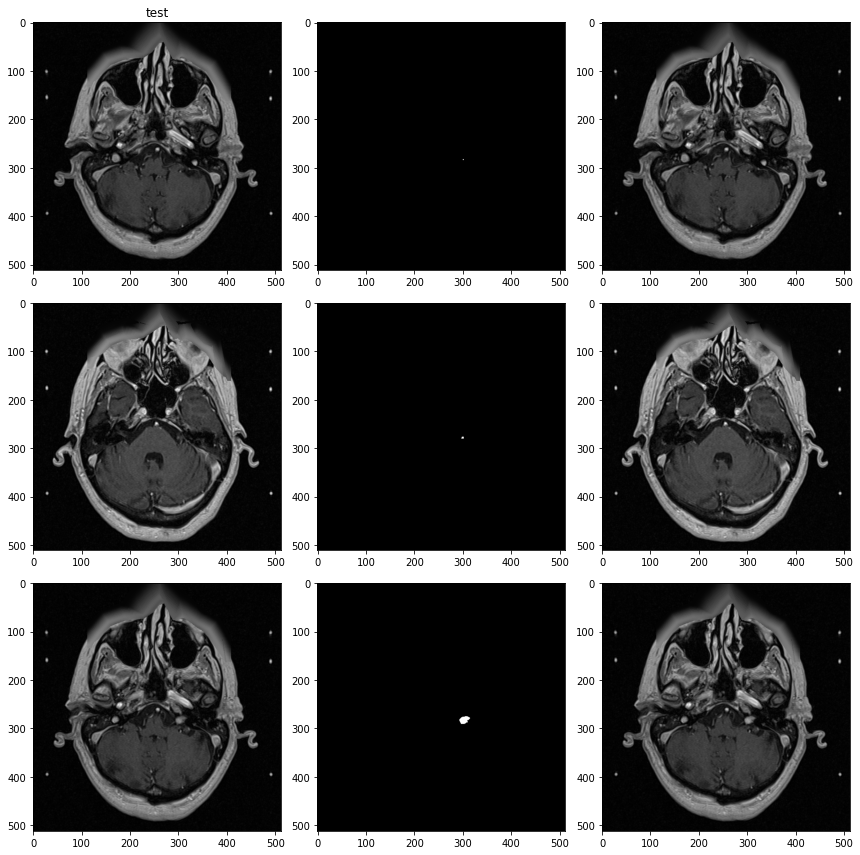

In [107]:
plot_qc(img_data, mask_data) 

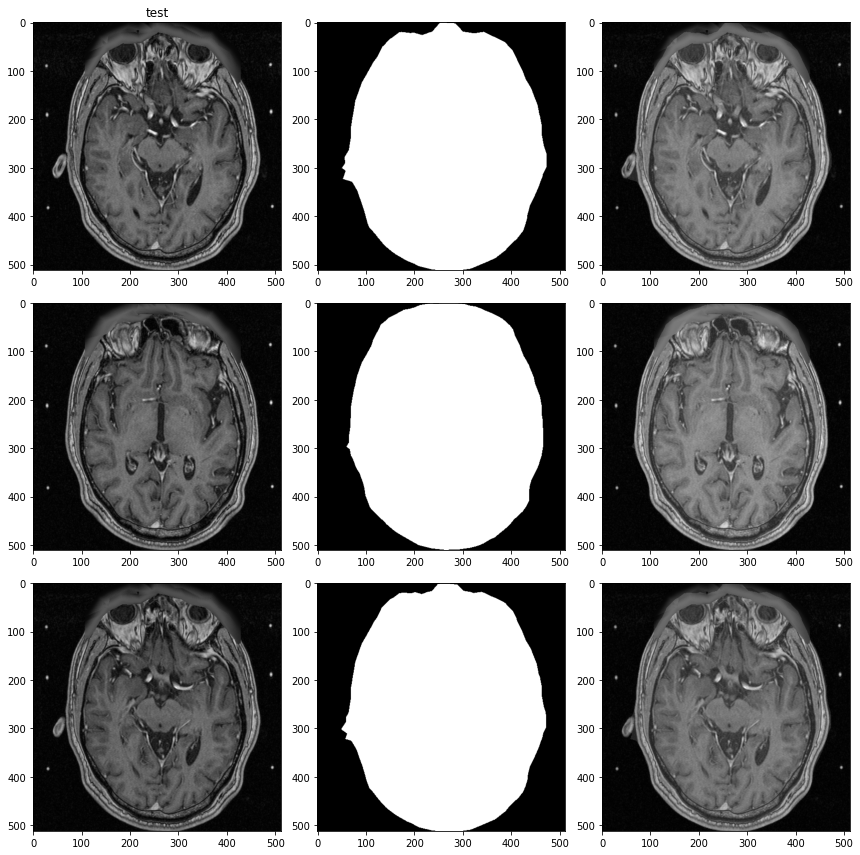

In [83]:
def plot_qc(image, mask, patient_id ='test'):
    fig, axs = plt.subplots(3,3,figsize=(12,12))
    idx = np.argsort(mask.sum(axis=(0,1)))[-7:]
    for i in range(3):
        axs[i, 0].imshow(image[..., idx[i]], cmap='gray')
        axs[i, 1].imshow(mask[..., idx[i]], cmap='gray')
        axs[i, 2].imshow(image[..., idx[i]]+200*mask[..., idx[i]], cmap='gray')
    axs[0,0].set_title(patient_id)
    plt.tight_layout()
#     plt.savefig(f'/home/kate/projects/qc_preprocessing/{path}_gbm/{patient_id}.png', dpi=300)
    plt.plot()
    
plot_qc(img_data, mask_skull)    

## Saving test images

In [ ]:
import tqdm
path = '4a_resamp'

print('/home/kate/projects/qc_preprocessing/{}_schw/'.format(path))
os.makedirs('/home/kate/projects/qc_preprocessing/{}_schw/'.format(path), exist_ok = True)

def plot_qc(image, mask, patient_id):
    fig, axs = plt.subplots(3,3,figsize=(12,12))
    idx = np.argsort(mask.sum(axis=(0,1)))[-3:]
    for i in range(3):
        axs[i, 0].imshow(image[..., idx[i]], cmap='gray')
        axs[i, 1].imshow(mask[..., idx[i]], cmap='gray')
        axs[i, 2].imshow(image[..., idx[i]]+200*mask[..., idx[i]], cmap='gray')
    axs[0,0].set_title(patient_id)
    plt.tight_layout()
    plt.savefig(f'/home/kate/projects/qc_preprocessing/{path}_schw/{patient_id}.png', dpi=300)
    plt.plot()
    plt.close(fig)

output = '/anvar/public_datasets/preproc_study/schw/{}/'.format(path)

for patient in tqdm.tqdm(os.listdir(output)):
    try:
        im = ants.image_read(output + patient +'/T1.nii.gz')
        mask = ants.image_read(output + patient +'/T1_SEG.nii.gz')
        plot_qc(im, mask, patient_id=str(patient))
    except Exception as e:
        print(e, patient)

  0%|          | 0/243 [00:00<?, ?it/s]

/home/kate/projects/qc_preprocessing/4a_resamp_schw/


 16%|█▌        | 39/243 [01:56<09:37,  2.83s/it]

In [ ]:
#scp -r notebook_airi:/home/kate/projects/qc_preprocessing/3a_atlas_schw/ /mnt/d/